# Network_Intrusion_Detection

# Data Analysis

In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [171]:
data = pd.read_csv("/Users/rahuljogi/Desktop/@S4/ML/Project/Network Intrusion/Datasets/Train_data.csv")

In [172]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [173]:
has_missing_values = data.isnull().any().any()
has_missing_values

False

In [174]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [175]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [176]:
data.nunique()

duration                        758
protocol_type                     3
service                          66
flag                             11
src_bytes                      1665
dst_bytes                      3922
land                              2
wrong_fragment                    3
urgent                            2
hot                              22
num_failed_logins                 5
logged_in                         2
num_compromised                  28
root_shell                        2
su_attempted                      3
num_root                         28
num_file_creations               20
num_shells                        2
num_access_files                  7
num_outbound_cmds                 1
is_host_login                     1
is_guest_login                    2
count                           466
srv_count                       414
serror_rate                      70
srv_serror_rate                  56
rerror_rate                      72
srv_rerror_rate             

In [177]:
columns_with_less_than_5_unique_values = data.columns[data.nunique() <= 3]
#len(columns_with_less_than_5_unique_values)
columns_with_less_than_5_unique_values


Index(['protocol_type', 'land', 'wrong_fragment', 'urgent', 'logged_in',
       'root_shell', 'su_attempted', 'num_shells', 'num_outbound_cmds',
       'is_host_login', 'is_guest_login', 'class'],
      dtype='object')

# Data Pre-Processing and Cleaning

In [178]:
data['protocol_type'].nunique()

3

In [179]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['protocol_type'] = label_encoder.fit_transform(data['protocol_type'])

In [180]:
data['flag'] = label_encoder.fit_transform(data['flag'])

In [181]:
data['class'] = label_encoder.fit_transform(data['class'])

In [182]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,ftp_data,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,other,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,private,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,http,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,http,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [183]:
# unique_protocols = data['protocol_type'].unique()
# unique_protocols

In [184]:
# mapping_dict = {'tcp': 3, 'udp': 2, 'icmp': 1}
# data['protocol_type'] = data['protocol_type'].map(mapping_dict)
# data['protocol_type']


In [185]:
# data['service'].nunique()

In [186]:
# freq_encoding = data['service'].value_counts().to_dict()
# data['service'] = data['service'].map(freq_encoding)
# # Min-Max Scaling
# min_val = data['service'].min()
# max_val = data['service'].max()
# data['service'] = (data['service'] - min_val) / (max_val - min_val)

# print(data['service'])

In [187]:
# unique_flags = data['flag'].unique()
# unique_flags

In [188]:
# freq_encoding = data['flag'].value_counts().to_dict()
# data['flag'] = data['flag'].map(freq_encoding)
# # Min-Max Scaling
# min_val = data['flag'].min()
# max_val = data['flag'].max()
# data['flag'] = (data['flag'] - min_val) / (max_val - min_val)

# print(data['flag'])

In [189]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,ftp_data,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,other,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,private,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,http,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,http,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [190]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Normal 15601 -

DOS 13576  -----   Apache2, Netpune, Pod, Land, Smurf, Mailbomb

PROBE 4691 -----   Satan, Saint, Ipsweep, Portsweep, Msan, Nmap

U2R 411    -----   Buffer Overflow, Httptuneel, Rootkit, LoadModule, Xtern, Perl, Sql Attack

R2L 2763   -----   Phf, WarezMaster, Guess, Password, Imap, Spy, Xsnoop, Sendmail,

# Training

<AxesSubplot: xlabel='class', ylabel='count'>

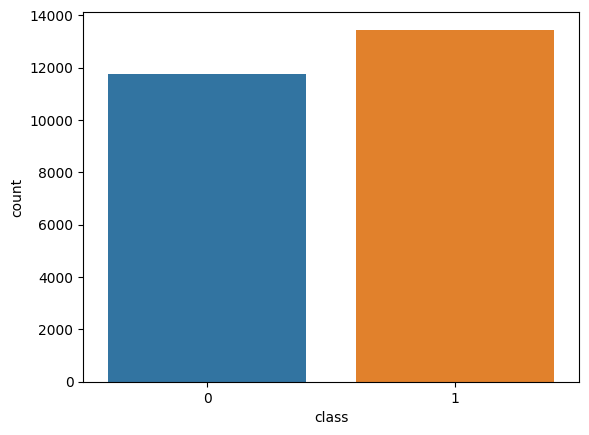

In [191]:
sns.countplot(x=data['class'])

In [192]:
data['class'].value_counts()

1    13449
0    11743
Name: class, dtype: int64

In [193]:
data['service'] = label_encoder.fit_transform(data['service'])
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


INPUT FEATURES :  All columns other than 'Class' Column

OUTPUT FEATURE:  'Class' Column only

In [194]:
##INPUT FEATURES ARE ALL OTHER THAN 'CLASS'
X_train = data.drop(['class'],axis=1)
# OUTPUT FEATURE
Y_train = data['class']

As there are 41 columns of input features, it is not a good practice for the model to build on this. So, we are going to use a Random Forest Classifier to determine the some Top 10 - 15 features that contributr more to the model building.

In [195]:
import itertools
rfc = RandomForestClassifier()
rfe = RFE(rfc,n_features_to_select=15)
rfe = rfe.fit(X_train,Y_train)

feature_map  = [(i,v) for i,v in itertools.zip_longest(rfe.get_support(),X_train.columns)]
selected_features = [v for i,v in feature_map if i==True]

selected_features



['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate']

In [196]:
X_train = X_train[selected_features]

In [197]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)


In [198]:
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,test_size=0.3,random_state=2)

In [199]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(17634, 15)
(17634,)
(7558, 15)
(7558,)


In [200]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score   


In [222]:
KNN = KNeighborsClassifier(1000)
KNN.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=1000)

In [223]:
y_pred = KNN.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy: 0.9183646467319396


Now, If you want to test for a particular feature in the dataset you can input the Index and Can know whether it is detected or not...

In [226]:
d = int(input("Enter Index of Datapoint:"))
aaa = X_test[d].reshape(1, -1)
y_pred_single_feature = KNN.predict(aaa)
if y_pred_single_feature:
     print("Normal Data Readings - No Intrusions detected")
else:
     original_data_point = scaling.inverse_transform(aaa).reshape(-1)
     original_data_formatted = [f"{val:.3f}" if not val.is_integer() else f"{int(val)}" for val in original_data_point]
     print(f"Intrusion Detected for Given Data,:{original_data_formatted}")     

Intrusion Detected for Given Data,:['2', '41', '9', '145.000', '105', '0', '1', '1', '1', '0', '1', '0', '0.660', '0.940', '0']


Using Decison Tree

In [242]:
dt = DecisionTreeClassifier(max_depth=10,criterion='entropy')
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [243]:
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy: 0.9927229425774015


In [247]:
d = int(input("Enter Index of Datapoint:"))
aaa = X_test[d].reshape(1, -1)
y_pred_single_feature = dt.predict(aaa)
if y_pred_single_feature:
     print("Normal Data Readings - No Intrusions detected")
else:
     original_data_point = scaling.inverse_transform(aaa).reshape(-1)
     original_data_formatted = [f"{val:.3f}" if not val.is_integer() else f"{int(val)}" for val in original_data_point]
     print(f"Intrusion Detected for Given Data,:{original_data_formatted}")     

Intrusion Detected for Given Data,:['1', '17', '5', '0', '-0.000', '0', '21', '6', '0.290', '0.190', '41', '0.160', '0.040', '0', '0']


# Testing on Un-seen Dataset